<font size="5">Lending Club EDA Case Study</font>

**Problem Statement**
**:**
This Case Study is basically centered upon the risks involved in the loans approved by the banks. 
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
> If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

> If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
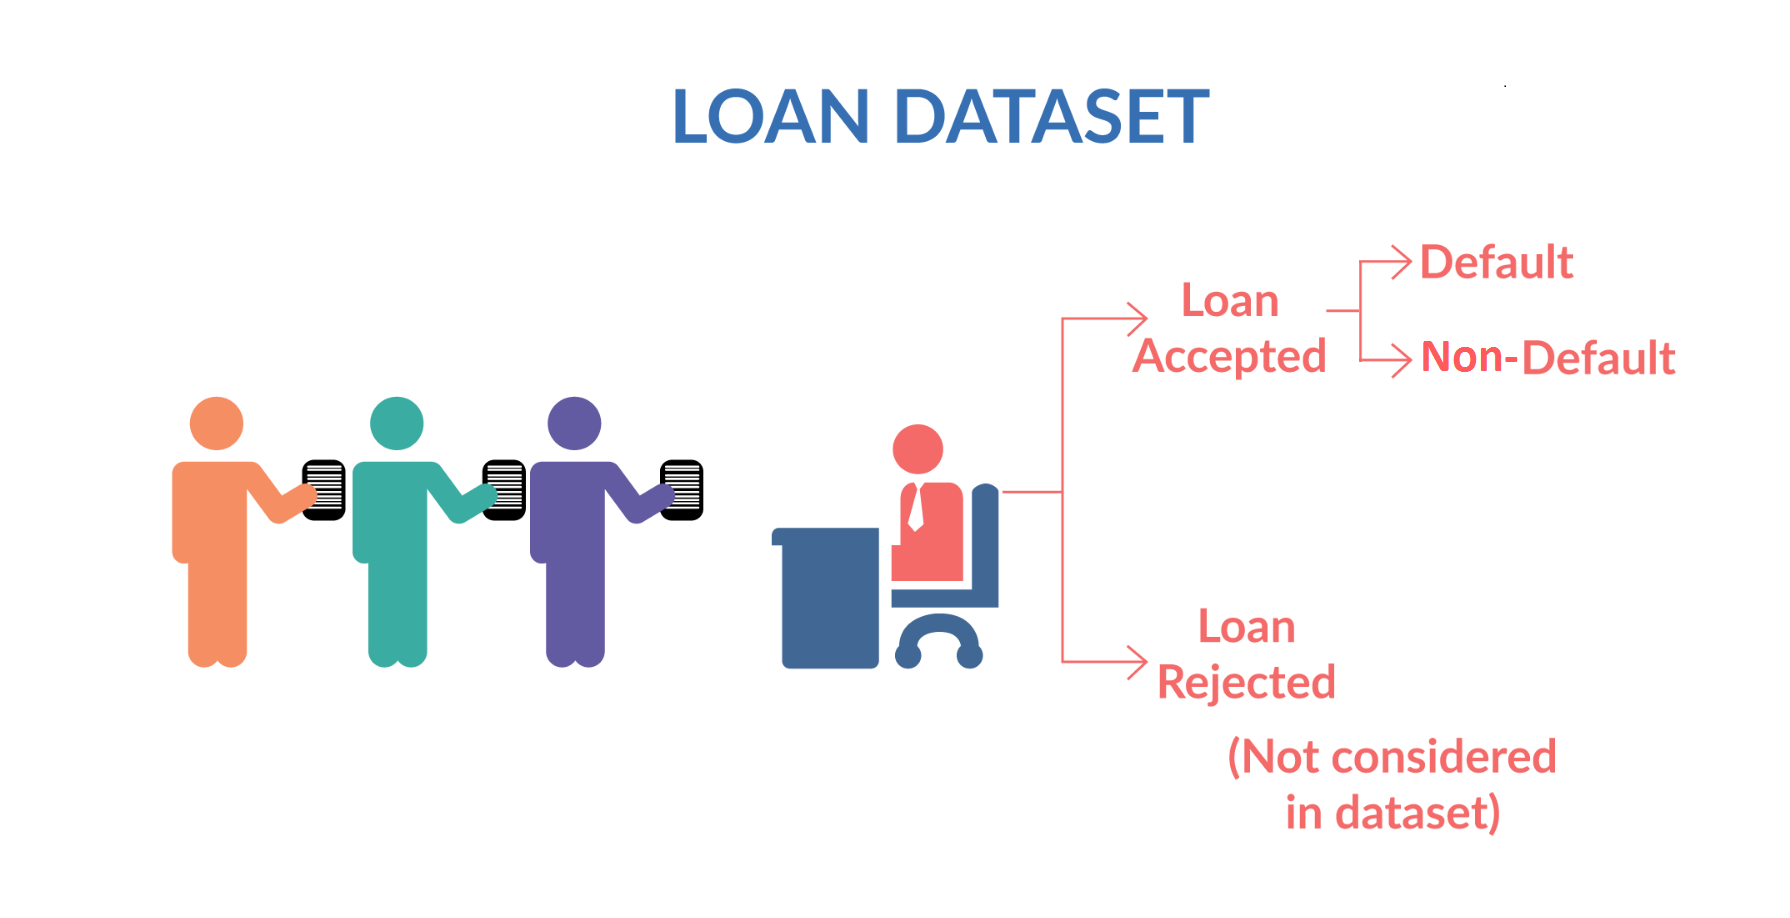
When a person applies for a loan, there are two types of decisions that could be taken by the company:

When a person applies for a loan, there are two types of decisions that could be taken by the company:
> Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

>> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

>> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

>> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

> Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

**Importing Libraries**


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats

**Importing Data** 

In [213]:
#Read Data
loan_dt=pd.read_csv('loan.csv')

C:\Users\sajag\AppData\Local\Temp\ipykernel_29688\681397221.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dt=pd.read_csv('loan.csv')


**Data Understanding**

In [214]:
#Get shape of data (rows, columns)
loan_dt.shape

(39717, 111)

In [215]:
#Get some insights of data
loan_dt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [216]:
loan_dt.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [217]:
loan_dt.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [218]:
loan_dt.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [219]:
# get the count, size and Unique value in each column of loan data
loan_dt.agg(['count','size','nunique'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
size,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717
nunique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0


**Data Cleaning**
1. Data Quality Check and Missing Values.
2. Dropping Values having only one distinct value.
3. Stripping extraa characters from the values in columns
4. Dropping Columns having Null values more than 20%.
5. Filling remaining Null values with the most frequent value/mean of the column.
6. Converting DataTypes of some of Variables.
7. Dropping Columns, those are Customer Behavioural Variables.

In [220]:
#Finding the sum of null values in all columns 
loan_dt.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [221]:
#Finding the sum of null values in all rows
loan_dt.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [222]:
#Dropping Columns and Rows having no value/null values 
loan_dt1 = loan_dt.dropna(axis='columns', how='all')
loan_dt1 = loan_dt1.dropna(axis='rows', how='all')

In [223]:
#Fetching the count of unique values in each Columns 
loan_dt1.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [224]:
#Dropping columns having only one value in whole column,as those will not affect the results
loan_dt1 = loan_dt1.loc[:,loan_dt1.nunique()!=1]

In [225]:
#Returning columns having more than one distinct values
loan_dt1.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

In [226]:
#Removing % sign from the column named - 'int_rate' & ' revol_util'
loan_dt1['int_rate'] = loan_dt1['int_rate'].apply(lambda a : str(a).rstrip('%'))
loan_dt1['revol_util'] = loan_dt1['revol_util'].apply(lambda a : str(a).rstrip('%'))
#Remove "Months" from variable 'term' as it is not required
loan_dt1['term'] = loan_dt1['term'].apply(lambda a : str(a).rstrip(' months'))
#Remove 'xx' from the 'zip_code'
loan_dt1['zip_code'] = loan_dt1['zip_code'].apply(lambda a : str(a).rstrip('xx'))
loan_dt1['emp_length']=loan_dt1.emp_length.str.extract('(\d+)')

In [227]:
#deleting columns having NaN values more than 20%
per=int(((100-20)/100)*loan_dt1.shape[0]+1)
loan_dt1 = loan_dt1.dropna(axis=1, thresh=per)


In [228]:
loan_dt1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [229]:
#Showing sorted sum of null values in all columns columns 
loan_dt1.isnull().sum().sort_values(ascending=False)

emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
title                        11
last_credit_pull_d            2
last_pymnt_amnt               0
out_prncp_inv                 0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_pymnt_inv               0
earliest_cr_line              0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
inq_last_6mths                0
id                            0
delinq_2yrs                   0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installm

**Checking the info of columns with missing values to understand what to fill in missing values**

In [230]:
loan_dt1['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [231]:
loan_dt1['emp_length'].describe()

count     38642
unique       10
top          10
freq       8879
Name: emp_length, dtype: object

In [232]:
loan_dt1['pub_rec_bankruptcies'].describe()


count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [233]:
loan_dt1['last_pymnt_d'].describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

In [234]:
loan_dt1['title'].describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [235]:
loan_dt1['last_credit_pull_d'].describe()

count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object

In [236]:
#fill the emp_title with "US Army" as it has the highest frequency
#loan_dt1 = loan_dt1.emp_title.fillna('US Army')
loan_dt1.loc[pd.isnull(loan_dt1['emp_title']), ['emp_title']] = 'US Army'
#fill the emp_length with "10+ years" as it has the highest frequency
loan_dt1.loc[pd.isnull(loan_dt1['emp_length']), ['emp_length']] = '10'
#fill the pub_rec_bankruptcies with "0.043260" as it is the mean value
loan_dt1.loc[pd.isnull(loan_dt1['pub_rec_bankruptcies']), ['pub_rec_bankruptcies']] = 0.043260
#fill the last_pymnt_d with "May-16" as it has the highest frequency
loan_dt1.loc[pd.isnull(loan_dt1['last_pymnt_d']), ['last_pymnt_d']] = 'May-16'
#fill the title with "Debt Consolidation" as it has the highest frequency
loan_dt1.loc[pd.isnull(loan_dt1['title']), ['title']] = 'Debt Consolidation'
#fill the last_credit_pull_d with "May-16" as it has the highest frequency
loan_dt1.loc[pd.isnull(loan_dt1['last_credit_pull_d']), ['last_credit_pull_d']] = 'May-16'

In [237]:
#Converting Datatypes of variables 

loan_dt1['issue_d'] = loan_dt1['issue_d'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('%m-%Y'))
loan_dt1['earliest_cr_line'] = loan_dt1['earliest_cr_line'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('%m-%Y'))
loan_dt1['last_credit_pull_d'] = loan_dt1['last_credit_pull_d'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('%m-%Y'))
loan_dt1['last_pymnt_d'] = loan_dt1['last_pymnt_d'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('%m-%Y'))
loan_dt1['int_rate'] = loan_dt1['int_rate'].astype(float)
loan_dt1['delinq_2yrs'] = loan_dt1['delinq_2yrs'].astype(int)
loan_dt1['inq_last_6mths'] = loan_dt1['inq_last_6mths'].astype(int)
loan_dt1['emp_length'] = loan_dt1['emp_length'].apply(pd.to_numeric)
loan_dt1["term"] = pd.to_numeric(loan_dt1["term"].apply(lambda x:x.split()[0]))

C:\Users\sajag\AppData\Local\Temp\ipykernel_29688\543932020.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  loan_dt1['issue_d'] = loan_dt1['issue_d'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('%m-%Y'))
C:\Users\sajag\AppData\Local\Temp\ipykernel_29688\543932020.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  loan_dt1['earliest_cr_line'] = loan_dt1['earliest_cr_line'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('%m-%Y'))
C:\Users\sajag\AppData\Local\Temp\ipykernel_29688\543932020.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  loan_dt1['last_credit_pull_d'] = loan_dt1['last_credit_pull_d'].apply(lambda a: pd.datetime.strptime(a, '%b-%y').strftime('

**After examining the columns and its meaning, dropping of some irrelevant columns which indicates the customer behaviour after taking the loan. Since we have to analyse variables which can indicate charged off applicant before taking the loan.**

Following variables are the Customer Behaviour Variables:
1. 'url'
2. 'delinq_2yrs'
3. 'earliest_cr_line'
4. 'inq_last_6mths'
5. 'open_acc'
6. 'pub_rec'
7. 'revol_bal'
8. 'revol_util'
9. 'total_acc'
10. 'out_prncp',
11. 'out_prncp_inv'
12. 'total_pymnt'
13. 'total_pymnt_inv'
14. 'total_rec_prncp'
15. 'total_rec_int'
16. 'total_rec_late_fee'
17. 'recoveries'
18. 'collection_recovery_fee'4
19. 'last_pymnt_d'
20. 'last_pymnt_amnt'
21. 'last_credit_pull_d'


In [238]:
# Dropping irrelevant Columns related to customer behaviour after taking loan.
loan_dt1.drop(['url','delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d'],inplace = True, axis=1)

#Dropping columns which does not give any useful information
loan_dt1.drop(columns=['id','title','zip_code','addr_state'],inplace = True, axis=1)

In [239]:
loan_dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  int64  
 5   int_rate              39717 non-null  float64
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_title             39717 non-null  object 
 10  emp_length            39717 non-null  int64  
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

**Now we are left with 18 variables, let's find out the correlation between them**

In [240]:
#Bivariate Analysis
loan_dt1.corr()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
member_id,1.000000,0.140710,0.150322,0.257887,0.234265,0.074725,0.081025,0.128145,0.009380,0.096963,-0.008291
loan_amnt,0.140710,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.134996,0.271149,0.066439,-0.036933
funded_amnt,0.150322,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.134615,0.266965,0.066283,-0.038234
funded_amnt_inv,0.257887,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.147238,0.254375,0.074689,-0.042226
term,0.234265,0.361036,0.340510,0.360747,1.000000,0.451699,0.101973,0.107162,0.046675,0.082426,0.011948
int_rate,0.074725,0.309415,0.312619,0.306657,0.451699,1.000000,0.282703,-0.006075,0.053185,0.111162,0.082222
installment,0.081025,0.930288,0.956159,0.905039,0.101973,0.282703,1.000000,0.105397,0.270874,0.054186,-0.033800
emp_length,0.128145,0.134996,0.134615,0.147238,0.107162,-0.006075,0.105397,1.000000,0.094264,0.046913,0.068294
annual_inc,0.009380,0.271149,0.266965,0.254375,0.046675,0.053185,0.270874,0.094264,1.000000,-0.122732,-0.016486
dti,0.096963,0.066439,0.066283,0.074689,0.082426,0.111162,0.054186,0.046913,-0.122732,1.000000,0.005634


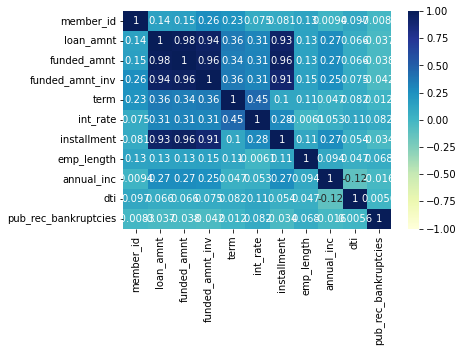

In [241]:
# plotting correlation heatmap
dataplot = sns.heatmap(loan_dt1.corr(),vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")

In [242]:
corrMatrix=loan_dt1.corr().abs()
upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
corrFeatures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.90)]
print(corrFeatures)


['funded_amnt', 'funded_amnt_inv', 'installment']


C:\Users\sajag\AppData\Local\Temp\ipykernel_29688\2785630020.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))


In [243]:
#dropping highly correlated columns because they bring the same information
loan_dt1.drop(columns=corrFeatures,inplace = True, axis=1)

In [244]:
##Derive Columns
# categorise emp_length,loan_amnt,annual_inc,int_rate  into buckets
loan_dt1['emp_length_bins'] = pd.cut(loan_dt1['emp_length'], [0, 2, 4, 6, 8, 10], labels=['less than 2', 'between 2 to 4', 'between 4 to 6', 'between 6 to 8', 'more than 10'])


loan_dt1['loan_amnt_bins'] = pd.cut(loan_dt1['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', 'more than 28000'])


loan_dt1['annual_inc_bins'] = pd.cut(loan_dt1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', 'more than 80000'])

loan_dt1['int_rate_bins'] = pd.cut(loan_dt1['int_rate'], [0, 10, 13, 16, 25], labels=['0-10', '10-13', '13-16', 'more than 16'])


**Univariate Analysis**

C:\Users\sajag\Application\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

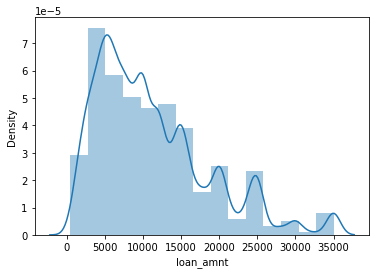

In [245]:
#Distribution plot of dependent variable - 'loan status'
sns.distplot(loan_dt1.loan_amnt, bins = 15)

**Observation** - Most of the loan amounts are in range of 5000-15000 dollars

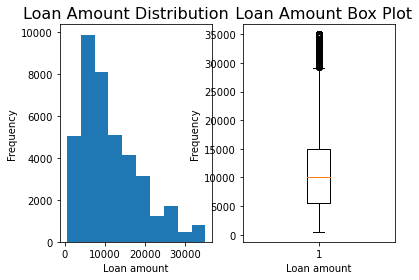

In [246]:
#Univariate analysis for loan_amnt

fig, (ax, ax2) = plt.subplots(1, 2)
#fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(loan_dt1['loan_amnt'])
ax.set_title('Loan Amount Distribution    ')
ax.set_xlabel('Loan amount')
ax.set_ylabel('Frequency')

ax2.boxplot(loan_dt1['loan_amnt'])
ax2.set_title('  Loan Amount Box Plot')
ax2.set_xlabel('Loan amount')
ax2.set_ylabel('Frequency')

plt.show()


**Observation :** Most of the people have taken loan amount of 5000 to 15000, there are very few who has taken loan of amount 30,000 and above. We can consider those as outliers for our analysis.


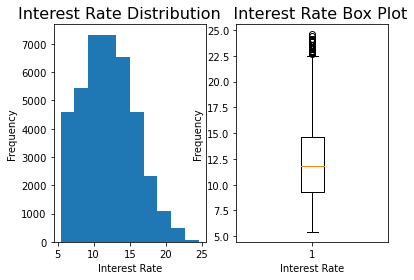

In [247]:
#Univariate analysis for int_rate

fig, (ax, ax2) = plt.subplots(1, 2)
#fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(loan_dt1['int_rate'])
ax.set_title('Interest Rate Distribution    ')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Frequency')


ax2.boxplot(loan_dt1['int_rate'])
ax2.set_title('   Interest Rate Box Plot')
ax2.set_xlabel('Interest Rate')
ax2.set_ylabel('Frequency')

plt.show()

**Observation**: Most of the people have taken loan in interest rate 8 to 15%, only few candidate have taken loan in very high interest rate more than 20%

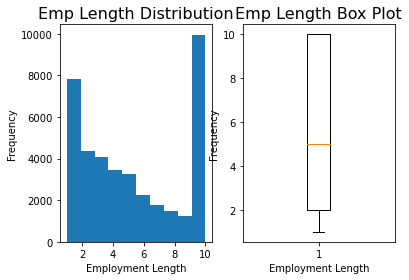

In [248]:
#Univariate analysis for emp_length

fig, (ax, ax2) = plt.subplots(1, 2)
#fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(loan_dt1['emp_length'])
ax.set_title('Emp Length Distribution')
ax.set_xlabel('Employment Length')
ax.set_ylabel('Frequency')


ax2.boxplot(loan_dt1['emp_length'])
ax2.set_title('Emp Length Box Plot')
ax2.set_xlabel('Employment Length')
ax2.set_ylabel('Frequency')

plt.show() 

**Observation:**: Though highest frequency of applicant have 10 or more years of employment but boxplot shows the maximum distribution is between 2 to 8

<AxesSubplot:>

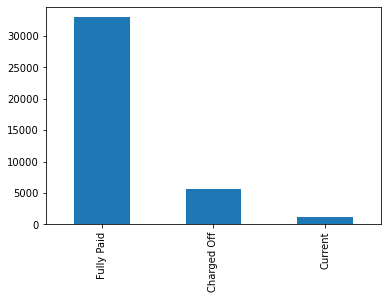

In [249]:
#Univariate analysis for loan status
loan_dt1['loan_status'].value_counts().plot(kind ='bar')
 

**Observation**
Count plot shows that around 5000 applicants were charged off and very few are in current status. 
Since current does not add any information for applicant whether the applicant will be chargedOff or not, 
We can remove rows with loan status - 'Current'


In [250]:
#dropping 'current' as this won't affect the hypothesis.this value can have any result - 'Default' or 'Non-default'
loan_dt1.drop(loan_dt1[loan_dt1.loan_status == 'Current'].index, inplace=True)

<AxesSubplot:>

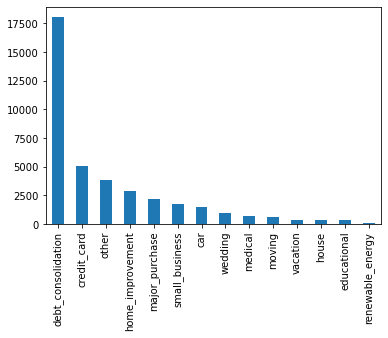

In [251]:
loan_dt1['purpose'].value_counts().plot(kind ='bar')


**Observation**
Indicates that most of the people have taken loan for debt consolidation but we cannot say from here that they are more likely to be charged off. Let's evaluate that in bivariate analysis.

**Bivariate Analysis**

In [252]:
# Bivariate Analysis - loan purpose against Charged Off percentage.

purpose_vs_loan = pd.crosstab(loan_dt1['purpose'],loan_dt1['loan_status'])
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
purpose,,,,
small_business,475,1279,1754,0.270810
renewable_energy,19,83,102,0.186275
educational,56,269,325,0.172308
other,633,3232,3865,0.163777
house,59,308,367,0.160763
moving,92,484,576,0.159722
medical,106,575,681,0.155653
debt_consolidation,2767,15288,18055,0.153254
vacation,53,322,375,0.141333


**Observations:**
Applicants whose purpose of loan is small Business have high chnaces of getting defaulted/charged off.

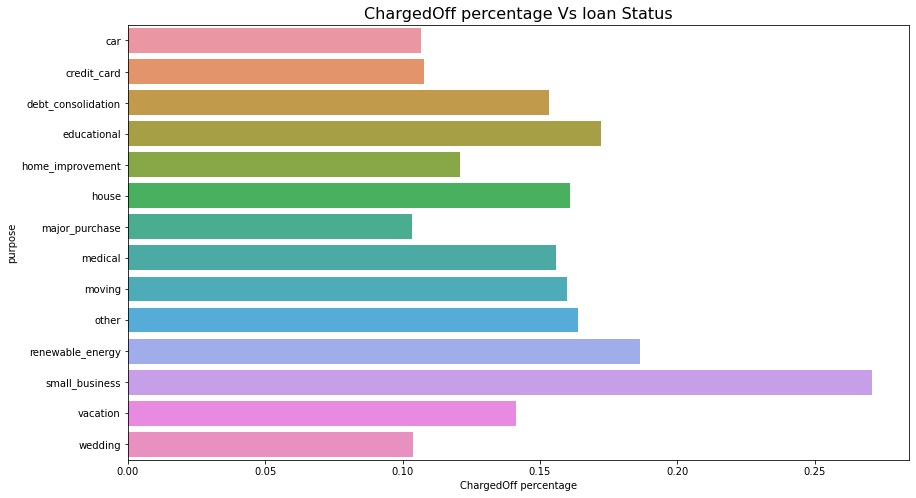

In [253]:
plt.figure(figsize=(14,8))
ax = sns.barplot(y=purpose_vs_loan.index, x ="Chargedoff_Proportion", data= purpose_vs_loan)
ax.set_title('ChargedOff percentage Vs loan Status')
ax.set_xlabel('ChargedOff percentage')
ax.set_ylabel('purpose')      
plt.show()

**Observation**: It is very evident from here that applicants who take loan for small business are more likely to be charged off.

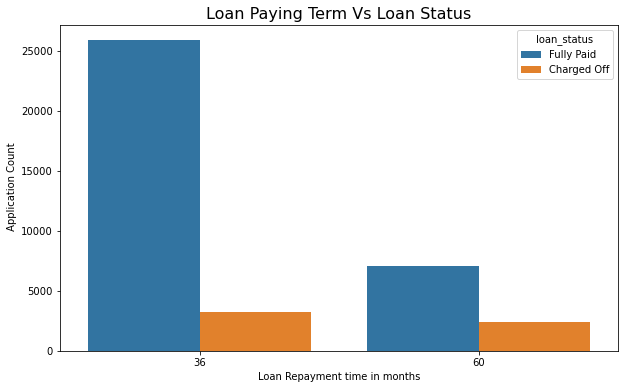

In [254]:
#Loan status Vs Loan Paying term
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan_dt1,hue='loan_status')
ax.set_title('Loan Paying Term Vs Loan Status')
ax.set_xlabel('Loan Repayment time in months')
ax.set_ylabel(' Application Count')      
plt.show()

**Observation**: Though number of charged off applicants are more who has take loan for 36 months but proportion/ ratio of chargedoff applicants is more on 60 months time duration. Hence who take loan for more time period are more likely to be charged off.

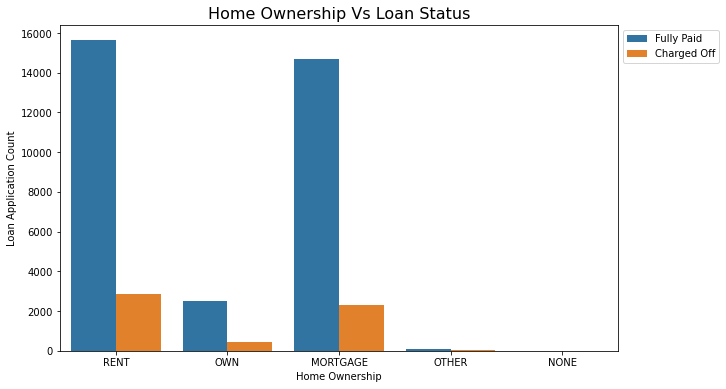

In [255]:
#Loan status Vs Home Ownership
plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loan_dt1,hue='loan_status')
ax.set_title('Home Ownership Vs Loan Status')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

**Observation** : Those applicants who are living in rent or mortgage property, they are more likely to be chargedoff.

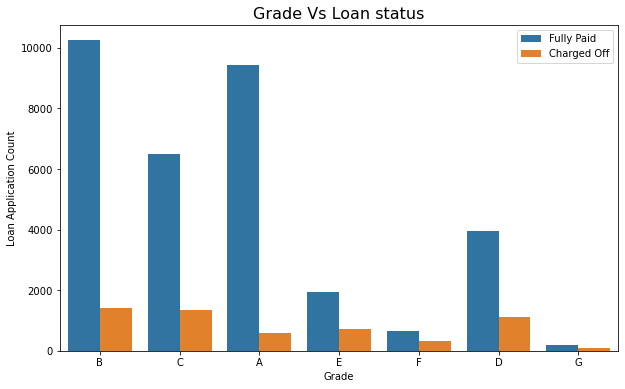

In [256]:
#Loan status Vs Grade
plt.figure(figsize=(10,6))
ax = sns.countplot(x="grade",data=loan_dt1,hue='loan_status')
ax.set_title('Grade Vs Loan status')
ax.set_xlabel('Grade')
ax.set_ylabel('Loan Application Count')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

**Observation** : Not very clear from this plot who are more likely to be charged off, the ratio of F,G looks more.

**Lets do a deeper analysis for this on the basis of proportion**

In [257]:
#Lets evaluate on the basis of proportion
grade_vs_loan = pd.crosstab(loan_dt1['grade'],loan_dt1['loan_status'])
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']  + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
grade,,,,
G,101,198,299,0.337793
F,319,657,976,0.326844
E,715,1948,2663,0.268494
D,1118,3967,5085,0.219862
C,1347,6487,7834,0.171943
B,1425,10250,11675,0.122056
A,602,9443,10045,0.059930


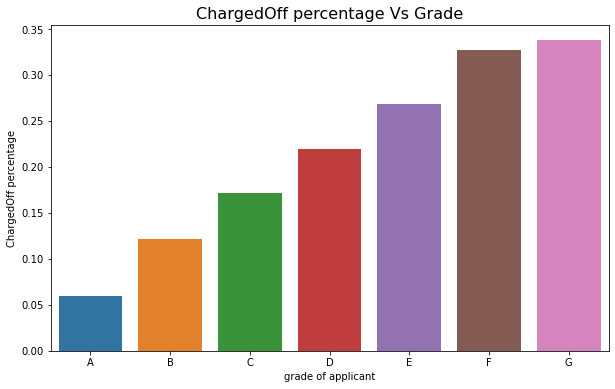

In [258]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x =grade_vs_loan.index,y="Chargedoff_Proportion",  data= grade_vs_loan)
ax.set_title('ChargedOff percentage Vs Grade')
ax.set_xlabel('grade of applicant')
ax.set_ylabel('ChargedOff percentage')      
plt.show()


**Observation** It is very evident from this, that applicants whose grade is F and G are more likely to default.

**Lets see how subgrades impact the loan status**

In [259]:
#Lets evaluate on the basis of proportion
sub_grade_vs_loan = pd.crosstab(loan_dt1['sub_grade'],loan_dt1['loan_status'])
sub_grade_vs_loan['Total'] = sub_grade_vs_loan['Charged Off']  + sub_grade_vs_loan['Fully Paid'] 
sub_grade_vs_loan['Chargedoff_Proportion'] = sub_grade_vs_loan['Charged Off'] / sub_grade_vs_loan['Total']
sub_grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
sub_grade,,,,
F5,54,59,113,0.477876
G3,19,26,45,0.422222
G2,28,49,77,0.363636
F4,53,98,151,0.350993
G5,10,19,29,0.344828
G1,31,63,94,0.329787
F2,70,163,233,0.300429
F1,91,214,305,0.298361
E4,126,298,424,0.297170


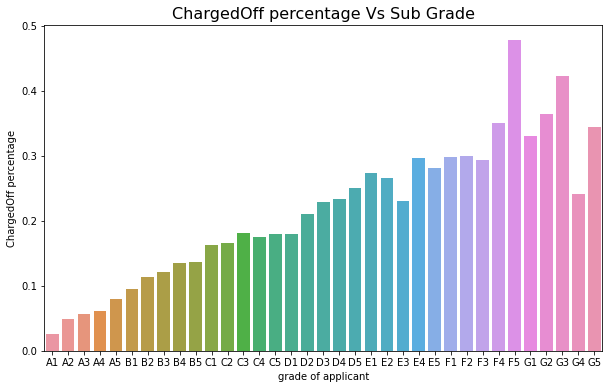

In [260]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x =sub_grade_vs_loan.index,y="Chargedoff_Proportion",  data= sub_grade_vs_loan)
ax.set_title('ChargedOff percentage Vs Sub Grade')
ax.set_xlabel('grade of applicant')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

**Observation** From here we can recommend that among F and G, F5,G2,G3 are more likely to be charged off.

In [261]:
emp_length_vs_loan = pd.crosstab(loan_dt1['emp_length_bins'],loan_dt1['loan_status'])
emp_length_vs_loan['Total'] = emp_length_vs_loan['Charged Off']+ emp_length_vs_loan['Fully Paid'] 
emp_length_vs_loan['Chargedoff_Proportion'] = emp_length_vs_loan['Charged Off'] / emp_length_vs_loan['Total']
emp_length_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
emp_length_bins,,,,
more than 10,1717,9030,10747,0.159766
between 6 to 8,466,2680,3146,0.148125
between 4 to 6,765,4597,5362,0.142671
less than 2,1662,10306,11968,0.138870
between 2 to 4,1017,6337,7354,0.138292


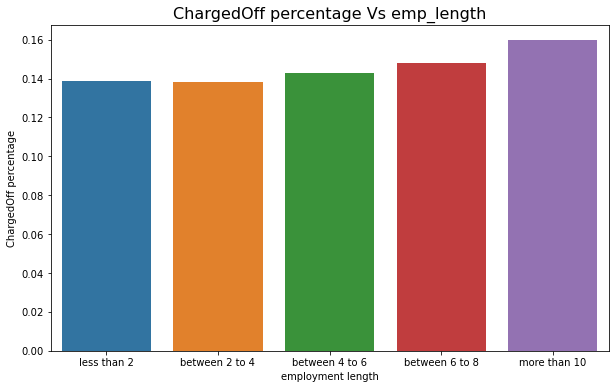

In [262]:
#Employment Length Vs Loan Status
plt.figure(figsize=(10,6))
ax = sns.barplot(x =emp_length_vs_loan.index,y="Chargedoff_Proportion",  data= emp_length_vs_loan)
ax.set_title('ChargedOff percentage Vs emp_length')
ax.set_xlabel('employment length')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

**Observation**: ChargedOff proportion is more if employment length is more than 10 years but it may be w.r.t to annual income and home ownership etc. we cannot say always 10 years + experience will be charged off.

**Lets evaluate annual income**

In [263]:
annual_inc_vs_loan = pd.crosstab(loan_dt1['annual_inc_bins'],loan_dt1['loan_status'])
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off']  + annual_inc_vs_loan['Fully Paid'] 
annual_inc_vs_loan['Chargedoff_Proportion'] = annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total']
annual_inc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
annual_inc_bins,,,,
0-20000,237,943,1180,0.200847
20000-40000,1514,7004,8518,0.177741
40000-60000,1729,9534,11263,0.153511
60000-80000,1024,6597,7621,0.134366
more than 80000,1122,8859,9981,0.112414


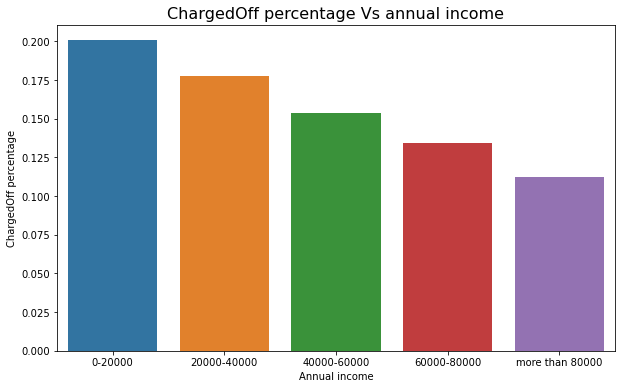

In [264]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x =annual_inc_vs_loan.index,y="Chargedoff_Proportion",  data= annual_inc_vs_loan)
ax.set_title('ChargedOff percentage Vs annual income')
ax.set_xlabel('Annual income')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

**Observation** : Applicants whose annual income is less than 20,000 are more likely to be chargedoff.

In [265]:
#Loam amount Vs loan status
loan_amnt_bins_vs_loan = pd.crosstab(loan_dt1['loan_amnt_bins'],loan_dt1['loan_status'])
loan_amnt_bins_vs_loan['Total'] = loan_amnt_bins_vs_loan['Charged Off'] + loan_amnt_bins_vs_loan['Fully Paid'] 
loan_amnt_bins_vs_loan['Chargedoff_Proportion'] = loan_amnt_bins_vs_loan['Charged Off'] / loan_amnt_bins_vs_loan['Total']
loan_amnt_bins_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
loan_amnt_bins,,,,
more than 28000,261,880,1141,0.228747
21000-28000,538,2252,2790,0.192832
14000-21000,1155,5886,7041,0.164039
7000-14000,1786,11512,13298,0.134306
0-7000,1887,12420,14307,0.131893


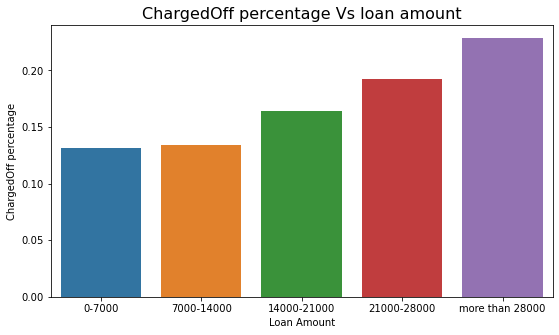

In [270]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x =loan_amnt_bins_vs_loan.index,y="Chargedoff_Proportion",  data= loan_amnt_bins_vs_loan)
ax.set_title('ChargedOff percentage Vs loan amount')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

**Observation**: Chances of being charged off increases as the loan amount increases.

In [267]:
#Interest rate Vs Loan Status
int_rate_bins_vs_loan = pd.crosstab(loan_dt1['int_rate_bins'],loan_dt1['loan_status'])
int_rate_bins_vs_loan['Total'] = int_rate_bins_vs_loan['Charged Off'] + int_rate_bins_vs_loan['Fully Paid'] 
int_rate_bins_vs_loan['Chargedoff_Proportion'] = int_rate_bins_vs_loan['Charged Off'] / int_rate_bins_vs_loan['Total']
int_rate_bins_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
int_rate_bins,,,,
more than 16,1562,3846,5408,0.288831
13-16,1644,7527,9171,0.179261
10-13,1591,10091,11682,0.136192
0-10,830,11486,12316,0.067392


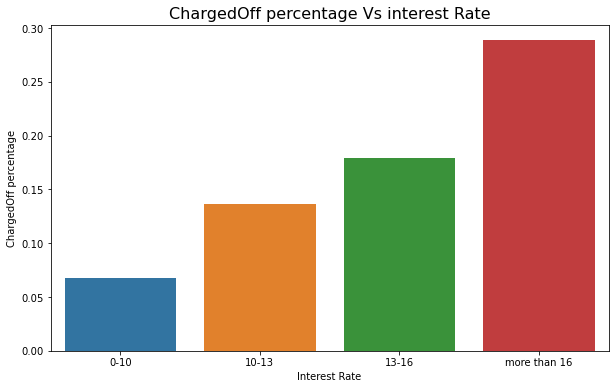

In [268]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x =int_rate_bins_vs_loan.index,y="Chargedoff_Proportion",  data= int_rate_bins_vs_loan)
ax.set_title('ChargedOff percentage Vs interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('ChargedOff percentage')      
plt.show()

**Observation** : Higher the interest rate, more is the risk of being charged off.


 **Important Variables that impact directly the loan status to be chargedOff or not.**
 1. Annual Income of Applicant
 2. Grade
 3. Subgrade 
 4. employment length.
 5. Home Ownership
 6. Loan Amount
 7. Repayment term of loan
 8. Interest Rate
 9. Purpose of loan 





**Consolidated Observation / Recommendation**


**If Applicant's annual income is less than 20,000 with grade F5,G2,G3 and employment length is more than 10 years then he is most likely to be charged off.**

**If Applicant's Home is rented or mortgaged, his purpose of loan is small business and term of repayment is more or equal to 60 months, he/she is most likely to be charged off.**

**Considering the above condition if loan amount is more than 28000 and interest rate kept is 16 then he is most likely be charged off.**